**Временные ряды** — это наборы данных, где каждая точка данных связана с определенным моментом времени.

временные ряды предоставляют нам ценную информацию о том, как меняются данные со временем.


Основные характеристики временных рядов

**Тренд:** долгосрочное изменение в данных - рост или спад. Например, если продажи компании растут каждый месяц в течение года, это будет проявление тренда.

**Сезонность:** Сезонность — это циклические изменения данных, которые повторяются с постоянным интервалом времени. Например, рост продаж из-за праздников или в определенные сезоны.

**Шум:** Шум представляет собой случайные колебания данных, которые не подчиняются определенным закономерностям. Это может быть вызвано различными факторами, такими как случайные события или ошибки измерения.

**Циклы:** Циклы — это долгосрочные колебания данных, которые не связаны с сезонностью. Например, экономические циклы могут вызывать волны роста и спада в продажах.

**Стационарность:** Стационарный временной ряд — это ряд, в котором статистические характеристики, такие как среднее и дисперсия, остаются постоянными с течением времени. Многие методы анализа временных рядов предполагают стационарность данных.

**Автокорреляция:** Автокорреляция — это корреляция между значениями ряда в разные моменты времени. Она может помочь выявить закономерности в данных.

**Пропущенные значения:** Временные ряды могут содержать пропущенные значения, которые требуется обработать перед анализом.

- сделать автокорреляцию два графика (разобраться в графиках и написать выводы)
- попробовать доработать SARIMA?
- попробовать ARIMA?

- streamlit
- другие модельки (бустинг/что-то ещё)
- оформление ipynb и конспекта
- метрики
- кросс-валидация

??добавить признаки:??
- среднее;
- взвешенное среднее;
- экспоненциальное сглаживание;
- медиана;
- минимум/максимум;
- стандартное отклонение;
- любую другую статистику.

In [ ]:
# еще проверка на стационарность, но в другом ключе

# def kpss_test(timeseries):
#   print ('Results of KPSS Test:')
#   kpsstest = kpss(timeseries, regression='c')
#   kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
#   for key,value in kpsstest[3].items():
#   kpss_output['Critical Value (%s)'%key] = value
#   print (kpss_output)

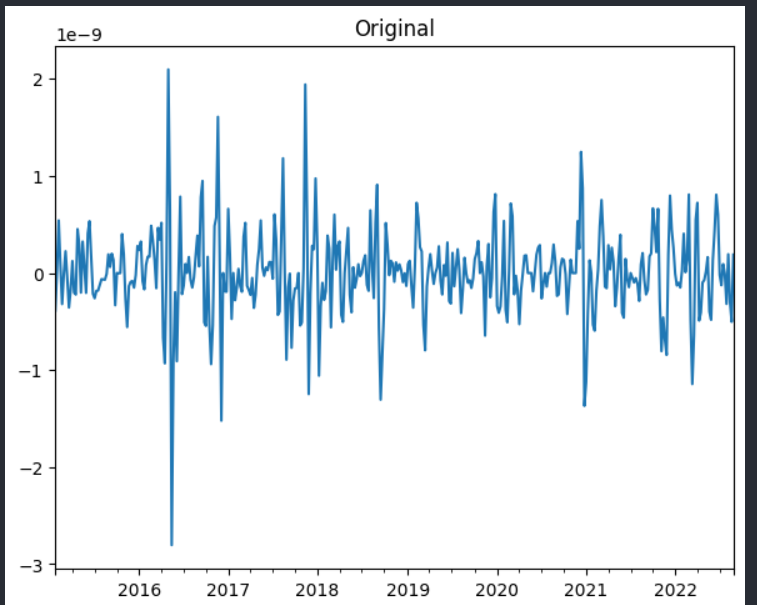

логарифмирование, бокс-кокс, дифференцирование

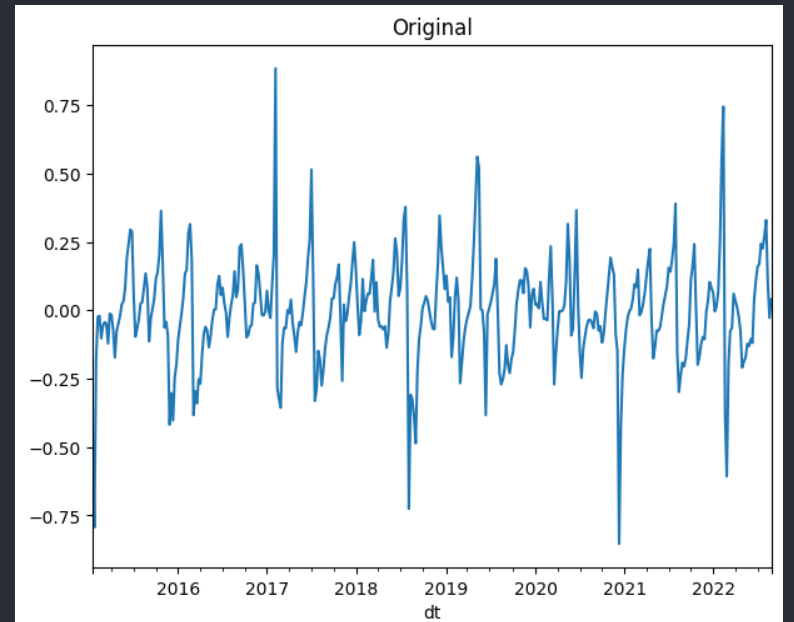

скользящее среднее, логарифмирование, дифференцирование

todo:

- всё-таки построить ARIMA/SARIMAX
- autoreg
- попробовать по-другому построить приведение к стационарности

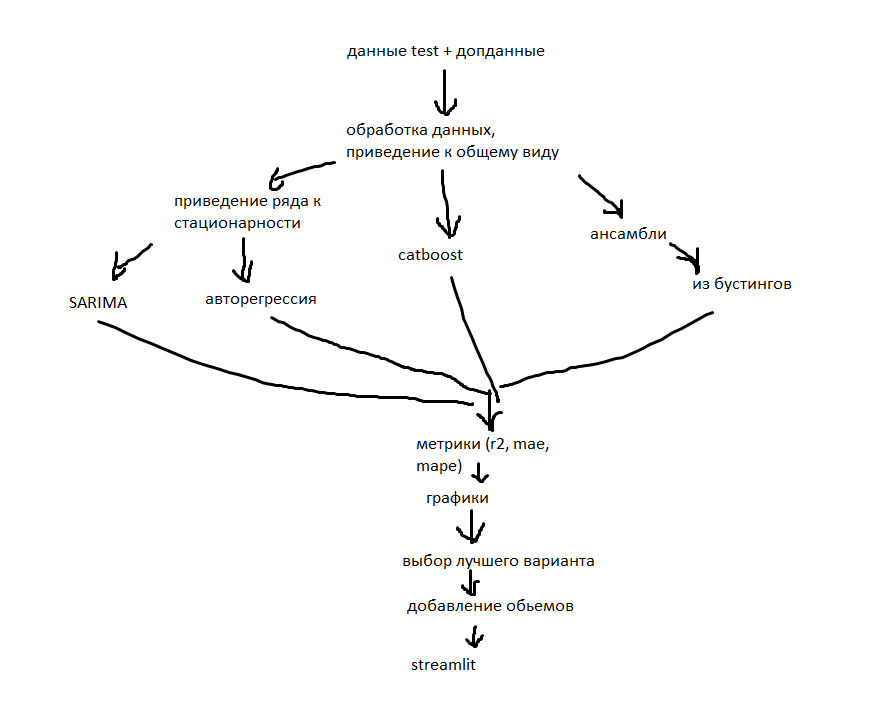

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

def timeseriesCVscore(x):
    # вектор ошибок
    errors = []

    values = df.values
    alpha, beta, gamma = x

    # задаём число фолдов для кросс-валидации
    tscv = TimeSeriesSplit(n_splits=3) 

    # идем по фолдам, на каждом обучаем модель, строим прогноз на отложенной выборке и считаем ошибку
    for train, test in tscv.split(values):

        model = HoltWinters(series=values[train], slen = 24*7, alpha=alpha, beta=beta, gamma=gamma, n_preds=len(test))
        model.triple_exponential_smoothing()

        predictions = model.result[-len(test):]
        actual = values[test]
        error = mean_squared_error(predictions, actual)
        errors.append(error)

    # Возвращаем средний квадрат ошибки по вектору ошибок 
    return np.mean(np.array(errors))

- отрисовать необходимые графики сравнения для презентации
- построить аналогичную LightGBM модель для CatBoost
- попробовать поиграть с лагами на основе выводов из анализа

в приложении:
- добавить возможность вводить разную дату